✿ Orijinal veri setindeki sınıfları görüntülüyorum.

In [1]:
import os

base_dir = "/kaggle/input/sea-animals-image-dataste"
print(os.listdir(base_dir))

['Penguin', 'Clams', 'Lobster', 'Otter', 'Eel', 'Corals', 'Puffers', 'Squid', 'Whale', 'Sea Urchins', 'Crabs', 'Starfish', 'Seal', 'Octopus', 'Shrimp', 'Sharks', 'Sea Rays', 'Fish', 'Seahorse', 'Nudibranchs', 'Dolphin', 'Turtle_Tortoise', 'Jelly Fish']


✿ Her sınıfa ait ne kadar görsel olduğuna da baktım.

In [2]:
for c in os.listdir(base_dir):
    c_path = os.path.join(base_dir, c)
    print(f"{c}: {len(os.listdir(c_path))} adet görsel")

Penguin: 482 adet görsel
Clams: 497 adet görsel
Lobster: 499 adet görsel
Otter: 500 adet görsel
Eel: 497 adet görsel
Corals: 500 adet görsel
Puffers: 531 adet görsel
Squid: 483 adet görsel
Whale: 572 adet görsel
Sea Urchins: 579 adet görsel
Crabs: 499 adet görsel
Starfish: 499 adet görsel
Seal: 414 adet görsel
Octopus: 562 adet görsel
Shrimp: 488 adet görsel
Sharks: 590 adet görsel
Sea Rays: 517 adet görsel
Fish: 494 adet görsel
Seahorse: 478 adet görsel
Nudibranchs: 500 adet görsel
Dolphin: 782 adet görsel
Turtle_Tortoise: 1903 adet görsel
Jelly Fish: 845 adet görsel


✿ Aynı işlemleri iki farklı sınıf içeren kendi veri setim için de yaptım.

In [3]:
import os

base_dir = "/kaggle/input/serhan-ilhan-sea-animals-photos-dataset"
print(os.listdir(base_dir))

['SerhanFish', 'SerhanCorals']


In [4]:
for c in os.listdir(base_dir):
    c_path = os.path.join(base_dir, c)
    print(f"{c}: {len(os.listdir(c_path))} adet görsel")

SerhanFish: 20 adet görsel
SerhanCorals: 10 adet görsel


# Veri Setlerini Birleştirme

✿  Orijinal veri setini working alanında oluşturduğum 'merged_dataset' klasörüne kopyalıyorum.

In [2]:
import shutil
import os


src = "/kaggle/input/sea-animals-image-dataste"

dst = "/kaggle/working/merged_dataset"

os.makedirs(dst, exist_ok=True)
shutil.copytree(src, dst, dirs_exist_ok=True)

print("Orijinal dataset merged_dataset içine kopyalandı.")

Orijinal dataset working/merged_dataset içine kopyalandı!


✿ Kendi veri setimde bulunan `SerhanCorals` sınıfındaki tüm görselleri `merged_dataset` içerisindeki `Corals` sınıfına kopyalıyorum.

In [3]:
import os
import shutil

src = "/kaggle/input/serhan-ilhan-sea-animals-photos-dataset/SerhanCorals"
dst = "/kaggle/working/merged_dataset/Corals"

os.makedirs(dst, exist_ok=True)

for img in os.listdir(src):
    src_path = os.path.join(src, img)
    dst_path = os.path.join(dst, img)
    shutil.copy(src_path, dst_path)

print("SerhanCorals görselleri merged_dataset/Corals içine kopyalandı.")

SerhanCorals görselleri merged_dataset/Corals içine kopyalandı.


✿ Aynı işlemi `SerhanFish` sınıfındaki görseller için de yapıyorum. Bu kez görseller `merged_dataset`'te bulunan `Fish` sınıfına kopyalanıyor.

In [4]:
import os
import shutil

src_fish   = "/kaggle/input/serhan-ilhan-sea-animals-photos-dataset/SerhanFish"
dst_fish   = "/kaggle/working/merged_dataset/Fish"

os.makedirs(dst_fish, exist_ok=True)

for img in os.listdir(src_fish):
    shutil.copy(os.path.join(src_fish, img), os.path.join(dst_fish, img))

print("SerhanFish görselleri merged_dataset/Fish içine kopyalandı.")

SerhanFish görselleri merged_dataset/Fish içine kopyalandı.


✿ working içinde bulunan `merged_dataset`'i kalıcı bir dataset haline getirebilmek için zip dosyası haline getirip kendi bilgisayarıma yükledikten sonra input alanına `my-merged-dataset` adı ile upload ediyorum. Böylece kendi veri setim ile orijinal veri setini birleştirdiğim bir veri seti oluşturmuş oluyorum.

In [5]:
import shutil

folder_to_zip = "/kaggle/working/merged_dataset"

output_zip = "/kaggle/working/merged_dataset.zip"

shutil.make_archive("/kaggle/working/merged_dataset", 'zip', folder_to_zip)

'/kaggle/working/merged_dataset.zip'

# Görselleri Temizleme ve Standart Formata Dönüştürme

✿ Bu hücrede, `my-merged-dataset` klasöründeki tüm görseller:

- **RGB renk formatına** dönüştürülüyor,  
- **224x224 boyutuna** yeniden boyutlandırılıyor,  
- **JPEG formatında** ve yüksek kalite (quality=95) ile `cleaned_dataset` klasörüne kaydediliyor.
   
✿ Her sınıf için ayrı klasörler oluşturuluyor ve dosya isimleri korunuyor.  
✿ Hatalı veya açılamayan görselleri ekrana yazdırarak da işlem sırasında gözlemleyebiliyorum.  


In [6]:
import os
from PIL import Image


input_dir = "/kaggle/input/my-merged-dataset"
output_dir = "/kaggle/working/cleaned_dataset"

os.makedirs(output_dir, exist_ok=True)

for class_name in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    output_class_path = os.path.join(output_dir, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).convert("RGB")
            img = img.resize((224, 224))       
            new_name = os.path.splitext(img_name)[0] + ".jpg"
            save_path = os.path.join(output_class_path, new_name)
            img.save(save_path, "JPEG", quality=95)
        except Exception as e:
            print(f"Hata: {img_name}, {e}")

✿ Temizlenmiş veri setimi kaybetmemek için tekrar zip dosyası haline getirip kendi bilgisayarıma indirdikten sonra input dataset alanına `cleaned-dataset`adı ile upload ediyorum.

In [7]:
import shutil

folder_to_zip = "/kaggle/working/cleaned_dataset"
output_zip = "/kaggle/working/cleaned_dataset.zip"

shutil.make_archive("/kaggle/working/cleaned_dataset", 'zip', folder_to_zip)

'/kaggle/working/cleaned_dataset.zip'

# Dataset'i Train/Validation/Test Olarak Bölme

✿ Bu hücrede`cleaned_dataset` klasöründeki verileri **train**, **val** ve **test** setleri olarak ayırıyorum. Ardında ayrılmış dataseti working alanına dataset_split olarak kaydediyorum.

   `train_ratio = 0.7` -> Verilerin %70'i eğitim için.  
   `val_ratio = 0.15` -> Verilerin %15'i doğrulama için.  
   `test_ratio = 0.15` -> Verilerin %15'i test için.  

✿ Her sınıf için resimler rastgele karıştırılıyor ve ilgili klasörlere kopyalanıyor.  
  
✿ Sonuç olarak model eğitiminde ve değerlendirmesinde kullanılacak verileri düzenli bir şekilde ayırmış oluyorum.

In [8]:
import os
import shutil
import random

source_dir = "/kaggle/working/cleaned_dataset"

split_dir = "/kaggle/working/dataset_split"
os.makedirs(split_dir, exist_ok=True)

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    imgs = [f for f in os.listdir(class_path) if f.lower().endswith(".jpg")]
    random.shuffle(imgs)

    n_total = len(imgs)
    n_train = int(n_total * train_ratio)
    n_val = int(n_total * val_ratio)
    n_test = n_total - n_train - n_val

    splits = {
        "train": imgs[:n_train],
        "val": imgs[n_train:n_train+n_val],
        "test": imgs[n_train+n_val:]
    }

    for split_name, split_imgs in splits.items():
        split_class_dir = os.path.join(split_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for img_name in split_imgs:
            src_path = os.path.join(class_path, img_name)
            dst_path = os.path.join(split_class_dir, img_name)
            shutil.copy(src_path, dst_path)

print("Dataset train/val/test olarak ayrıldı ve dataset_split klasörüne kaydedildi.")

Dataset train/val/test olarak ayrıldı ve dataset_split klasörüne kaydedildi.


✿ Kalıcılık adına bu klasörü de zip dosyası haline getirip kendi bilgisayarıma indirdikten sonra input dataset alanına `split-dataset` adı ile upload ediyorum.

In [5]:
import shutil

folder_to_zip = "/kaggle/working/dataset_split"
output_zip = "/kaggle/working/dataset_split.zip"

shutil.make_archive("/kaggle/working/dataset_split", 'zip', folder_to_zip)

dataset_split ziplendi: /kaggle/working/dataset_split.zip


# Train Seti Sınıf Dağılımının Görselleştirilmesi

✿ Data augmentation öncesi `dataset_split/train` klasöründeki her sınıfın görsel sayısını hesaplıyor ve grafik ile görselleştiriyorum.  
  
- `plt.xticks(rotation=90)` komutuyla sınıf isimlerini dikey göstererek okunabilirliği arttırıyorum.


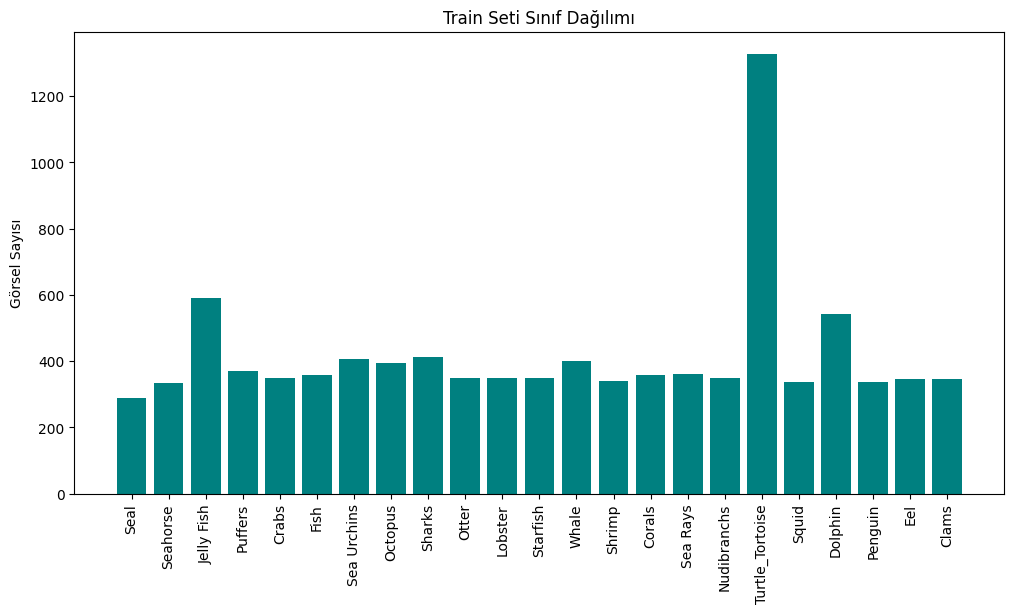

In [9]:
import os
import matplotlib.pyplot as plt

split_dir = "/kaggle/working/dataset_split/train"

class_counts = {}
for class_name in os.listdir(split_dir):
    class_path = os.path.join(split_dir, class_name)
    count = len([f for f in os.listdir(class_path) if f.lower().endswith(".jpg")])
    class_counts[class_name] = count

plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.xticks(rotation=90)
plt.ylabel("Görsel Sayısı")
plt.title("Train Seti Sınıf Dağılımı")
plt.show()

# ImageDataGenerator ile Veri Ön İşleme ve Augmentation

✿ Bu hücrede `ImageDataGenerator` kullanarak train, validation ve test verilerini hazırlıyorum.  

* **Train seti** için uyguladığım **data augmentation** teknikleri:

    Normalizasyon (`rescale=1./255`)
    Döndürme (0–30°)  
    Yatay/dikey kaydırma (%10)  
    Zoom (%20)  
    Yatay çevirme  
    Parlaklık jitter  
    `fill_mode="nearest"` ile boşluk doldurma

✿ **Validation** ve **Test** setlerinde yalnızca **normalize** işlemi yapıyorum.  

✿ Sonrasında `flow_from_directory` metodu ile train, validation ve test klasörlerinden veri okuyarak `generator` objeleri oluşturuyorum. Bu sayede model eğitiminde mini-batch halinde veriler otomatik besleniyor.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=30,       
    width_shift_range=0.1,   
    height_shift_range=0.1,  
    zoom_range=0.2,         
    horizontal_flip=True,    
    vertical_flip=False,     
    brightness_range=[0.8,1.2], 
    fill_mode="nearest"
)

# Validation ve Test için yalnızca normalize 
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/kaggle/working/dataset_split/train"
val_dir   = "/kaggle/working/dataset_split/val"
test_dir  = "/kaggle/working/dataset_split/test"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

Found 9601 images belonging to 23 classes.
Found 2048 images belonging to 23 classes.
Found 2081 images belonging to 23 classes.


# Data Augmentation Sonuçlarını Görselleştirme

✿ Bu hücrede, `ImageDataGenerator` ile tanımlanan **data augmentation** işlemlerinin görsellere nasıl yansıdığı inceleyebilmek için görselleştirme yapıyorum.  

- Eğitim setinden bir batch alıp (32 görsel), ilk 9 görsel 3x3 grid halinde çizdiriliyor.  

✿ Bu sayede döndürme, kaydırma, zoom, yatay çevirme ve parlaklık değişikliklerinin örnek görseller üzerinde nasıl çalıştığını gözlemleyebiliyorum.  
✿ Modelin daha genelleştirilebilir hale gelmesi için augmentation etkileri burada görsel olarak kontrol edilmiş oluyor.

Found 9601 images belonging to 23 classes.


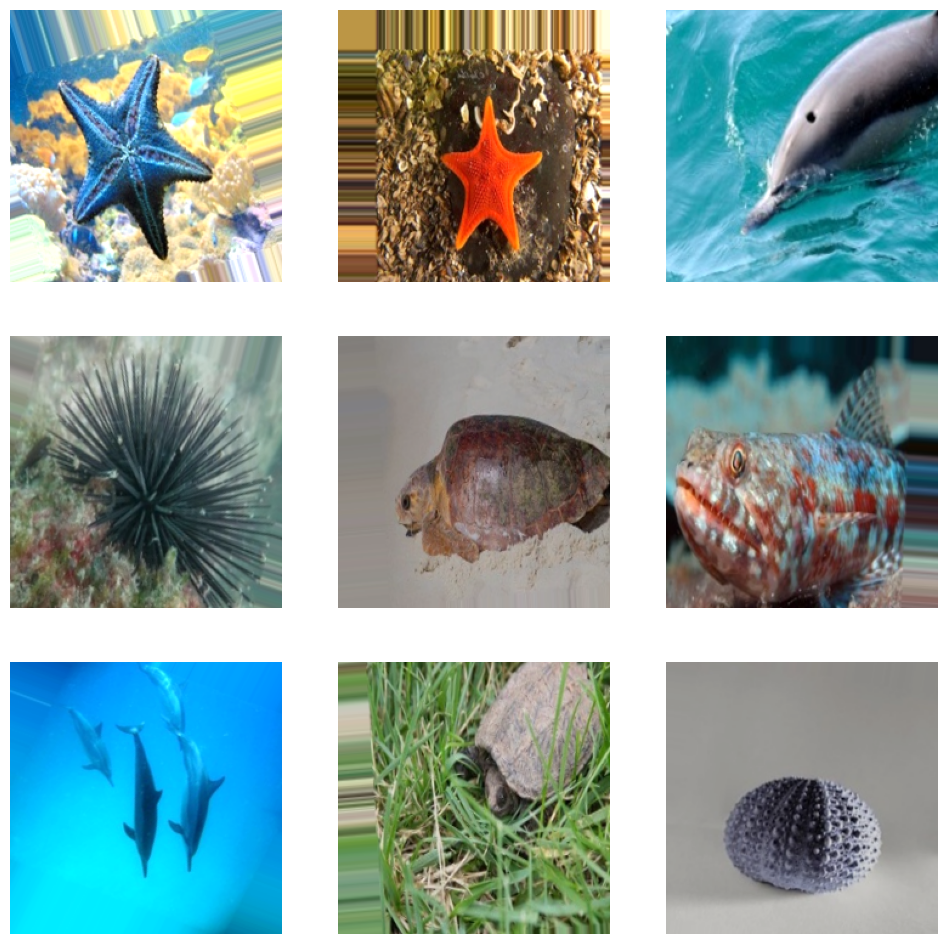

In [12]:
import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      
    width_shift_range=0.1,   
    height_shift_range=0.1, 
    zoom_range=0.2,         
    horizontal_flip=True,   
    brightness_range=[0.8,1.2] 
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/dataset_split/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis("off")
plt.show()

# Validation ve Test Veri Generator'larının Hazırlanması

✿ Bu hücrede, **validation** ve **test** setleri için `ImageDataGenerator` tanımlanıyor.  

* Sadece **rescale=1./255** uygulanıyor (normalize işlemi).  
* **Augmentation uygulamıyorum**, çünkü modelin doğrulama ve test performansı gerçekçi değerlendirilmeli.  
* `flow_from_directory` ile `val` ve `test` klasörlerinden veriler yükleniyor.  
* `shuffle=False` kullanılarak veri sırası korunuyor.  

✿ Kısaca model eğitiminden bağımsız olarak doğrulama ve test aşamalarında kullanılacak temiz veri akışlarını hazırlamış oluyorum.

In [13]:
# Validation için sadece rescale
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/kaggle/working/dataset_split/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Test için sadece rescale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/working/dataset_split/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2048 images belonging to 23 classes.
Found 2081 images belonging to 23 classes.


# Basit CNN Modeli Kurulumu ve Derleme

✿ Bu hücrede de Keras kullanrak sıfırdan bir **Convolutional Neural Network (CNN)** modeli oluşturuyorum.

* **Girdi**: (224x224x3) boyutunda renkli görseller  
* **Katmanlar**:  
  -> 3 adet Conv2D + MaxPooling blokları  
  -> Flatten -> Dense katmanı bağlantısı  
  -> 256 nöronlu Dense + Dropout(0.5)  
  ->`softmax` çıkış katmanı (23 sınıf için)  

* **Derleme (compile)**:  
  -> Optimizer: **Adam** (learning_rate=0.0001)  
  -> Loss: **categorical_crossentropy**  
  ->Metric: **accuracy**  


✿ Son adımda `model.summary()` çıktısı, her katmanın ismini, çıktı boyutunu ve öğrenilebilir parametre sayısını tablo halinde gösteriyor.   

In [14]:
from tensorflow.keras import layers, models, optimizers

num_classes = 23 

model = models.Sequential([
    # 1. Convolution + Pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),
    
    # 2. Convolution + Pooling
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # 3. Convolution + Pooling
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),         
    
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.5),                  
    
    layers.Dense(num_classes, activation='softmax') 
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758824419.420739      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758824419.421572      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,250,583 (84.88 MB)

 Trainable params: 22,250,583 (84.88 MB)

 Non-trainable params: 0 (0.00 B)

# Modelin Eğitilmesi ve Eğitim Sürecinin Görselleştirilmesi

✿ Bu hücrede CNN modelinin, eğitim ve doğrulama setleri üzerinden **25 epoch** boyunca eğitilmesini sağladım.  
`history` objesi, eğitim sırasında kaydedilen accuracy ve loss değerlerini saklıyor.  

- **Sol grafik**: Eğitim ve doğrulama accuracy (başarı oranı)  
- **Sağ grafik**: Eğitim ve doğrulama loss (kayıp)  

Bu görseller sayesinde:  
- Modelin **öğrenme eğrisi** takip edilebiliyor.  
- **Overfitting/underfitting** belirtileri gözlemlenebiliyor (örn. doğrulama kaybının artması).

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


I0000 00:00:1758824820.563743     183 service.cc:148] XLA service 0x7b87f400a410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758824820.565187     183 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758824820.565208     183 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758824821.119355     183 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.1094 - loss: 3.1052  

I0000 00:00:1758824828.176851     183 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 398ms/step - accuracy: 0.1701 - loss: 2.9490 - val_accuracy: 0.1699 - val_loss: 2.7360
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 370ms/step - accuracy: 0.2106 - loss: 2.7115 - val_accuracy: 0.2119 - val_loss: 2.5776
Epoch 3/25
  1/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.2500 - loss: 2.5802

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2500 - loss: 2.5802 - val_accuracy: 0.2148 - val_loss: 2.5767
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 378ms/step - accuracy: 0.2629 - loss: 2.5703 - val_accuracy: 0.2188 - val_loss: 2.5354
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 369ms/step - accuracy: 0.2492 - loss: 2.5415 - val_accuracy: 0.2236 - val_loss: 2.5203
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2812 - loss: 2.3169 - val_accuracy: 0.2334 - val_loss: 2.5049
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 372ms/step - accuracy: 0.2665 - loss: 2.4769 - val_accuracy: 0.2441 - val_loss: 2.4735
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 55s 371ms/step - accuracy: 0.2710 - loss: 2.4229 - val_accuracy: 0.2666 - val_loss: 2.3772
Epoch 9/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2500 - loss: 2.6177 - val_accuracy: 0.2617 - val_loss: 2.3819
Epoch 10/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 56s 374ms/step - accuracy: 0.2809 - loss: 2.4227 - val_accurac

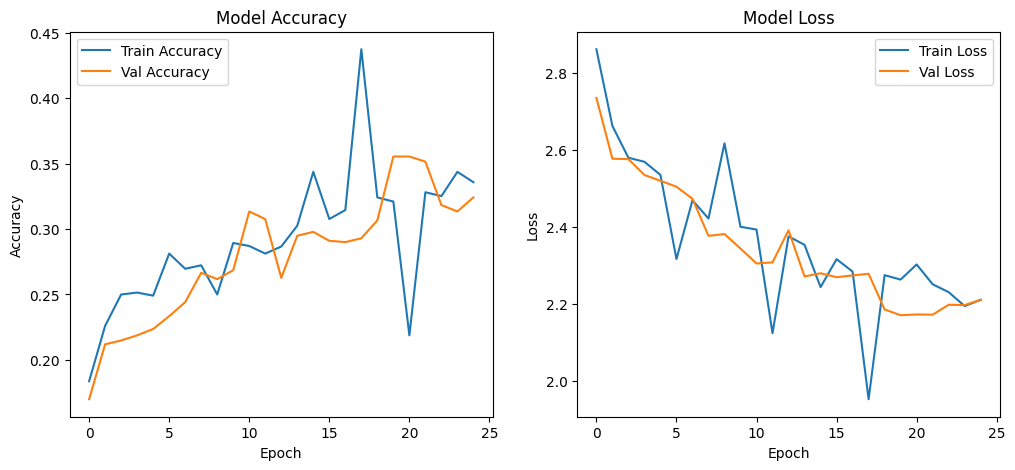

In [15]:
import matplotlib.pyplot as plt

epochs = 25
batch_size = 64 

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Pre-trained VGG16 ile Transfer Learning Modeli

Henüz yeterli veriye ulaşamadığımı düşündüğüm için :') **pre trained VGG16** kullanarak transfer learning uyguluyorum. Böylece daha az veriyle yüksek performans elde edilebilir.

1. **Base Model**  
   - `VGG16(weights='imagenet', include_top=False)` ile ImageNet üzerinde eğitilmiş ağırlıklar yükleniyor.  
   - `include_top=False` Orijinal sınıflandırma katmanları kaldırılıyor, sadece özellik çıkarıcı katmanlar alınıyor.  
   - `input_shape=(224,224,3)` Modelin giriş boyutu ayarlanıyor.  

2. **Base model dondurma**  
   - `base_model.trainable = False` ile önceden öğrenilmiş katmanlar eğitim sırasında güncellenmeyecek, sadece üst katmanlar eğitilecek.  

3. **Yeni üst katmanlar ekleme**  
   - Flatten -> Dense(256, relu) -> Dropout(0.5) -> Dense(23, softmax)  
   - Bu katmanlar datasetimizdeki sınıfları öğrenmek için eklendi.  

4. **Compile**  
   - Optimizer: Adam (lr=0.0001)  
   - Loss: Categorical Crossentropy  
   - Metric: Accuracy  

* `model.summary()` ile modelin mimarisi ve toplam parametre sayısı görüntüleniyor.  


In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# dataset için
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# görselleştirme için
import matplotlib.pyplot as plt
import os

In [18]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

base_model.trainable = False

# Yeni üst katmanlar
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(23, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,143,383 (80.66 MB)

 Trainable params: 6,428,695 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Transfer Learning Modelinin Eğitilmesi

✿ Bu hücrede, VGG16 tabanlı transfer learning modeli eğitim ve doğrulama setleri üzerinde **25 epoch** boyunca eğitiliyor.  

- `train_generator` -> Eğitim verilerini besler (augmentation + normalize)  
- `val_generator` -> Doğrulama verilerini besler (sadece normalize)  
- `steps_per_epoch` ve `validation_steps` -> Her epoch için kaç batch işleneceğini belirler  

✿ Eğitim sırasında `history` objesi, her epoch sonrası **loss** ve **accuracy** değerlerini saklar. Bu değerleri eğitim eğrilerini görselleştirmek için kullanacağım.

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 64,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 64,
    epochs=25
)

Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 85s 453ms/step - accuracy: 0.1646 - loss: 2.9622 - val_accuracy: 0.2842 - val_loss: 2.4067
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 445ms/step - accuracy: 0.3125 - loss: 2.3898 - val_accuracy: 0.4023 - val_loss: 2.1155
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.4375 - loss: 2.2270 - val_accuracy: 0.4131 - val_loss: 2.1081
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 447ms/step - accuracy: 0.3867 - loss: 2.1488 - val_accuracy: 0.4912 - val_loss: 1.8522
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 435ms/step - accuracy: 0.3754 - loss: 2.1230 - val_accuracy: 0.4600 - val_loss: 1.8462
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5000 - loss: 1.5768 - val_accuracy: 0.4668 - val_loss: 1.8455
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 440ms/step - accuracy: 0.4220 - loss: 1.9831 - val_accuracy: 0.5449 - val_loss: 1.6927
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 434ms/step - accuracy: 0.4463 - loss: 1.863

# Transfer Learning Modeli Eğitim Sonuçlarının Görselleştirilmesi

✿ `Sol grafikte`, eğitim ve **accuracy** değerleri, `sağ grafikte` eğitim ve **loss** değerleri epoch bazında gösteriliyor.

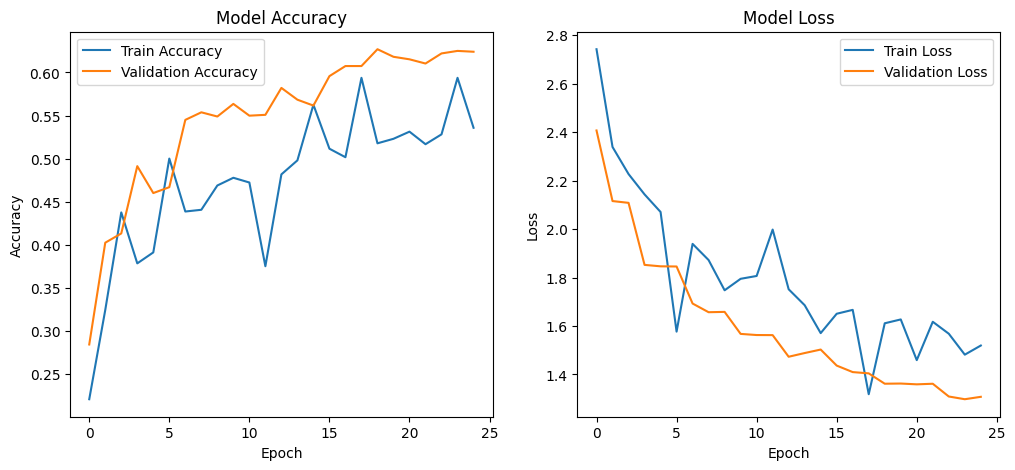

In [20]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss grafiği
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

≽^•⩊•^≼ Bu görüntü hoşuma gittiği için modeli kendi bilgisayarıma yüklüyorum. ≽^•⩊•^≼

In [24]:
model.save('/kaggle/working/sea_animals_cnn_vgg16.h5')

In [25]:
import shutil

model_path = "/kaggle/working/sea_animals_cnn_vgg16.h5"
shutil.make_archive("/kaggle/working/sea_animals_cnn_vgg16.h5", 'zip', root_dir="/kaggle/working", base_dir="sea_animals_cnn_vgg16.h5")

'/kaggle/working/sea_animals_cnn_vgg16.h5.zip'

# Test Seti Üzerinde Model Değerlendirmesi

✿ Bu hücrede, eğitilmiş model **test seti** üzerinde değerlendirilerek performansı detaylı olarak inceleyebiliriz.

1. **Tahminler (Predictions)**  
   - `model.predict(test_generator)` ile test setindeki tüm görseller için sınıf olasılıkları elde ediliyor.  
   - `np.argmax` ile en yüksek olasılığa sahip sınıf seçiliyor.  

2. **Confusion Matrix (Karışıklık Matrisi)**  
   - `confusion_matrix(y_true, y_pred)` ile gerçek ve tahmin edilen sınıflar karşılaştırılıyor.  
   - `seaborn` ile görselleştiriliyor.  
   - Matristeki yüksek değerler doğru sınıflandırmaları, yanlış sınıflandırmalar ise düşük değerlerle gösteriliyor.  

3. **Classification Report**  
   - `precision`, `recall`, `f1-score` ve `support` değerleri her sınıf için hesaplanıyor.  
   - Modelin hangi sınıflarda güçlü veya zayıf olduğu anlaşılabiliyor. 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step


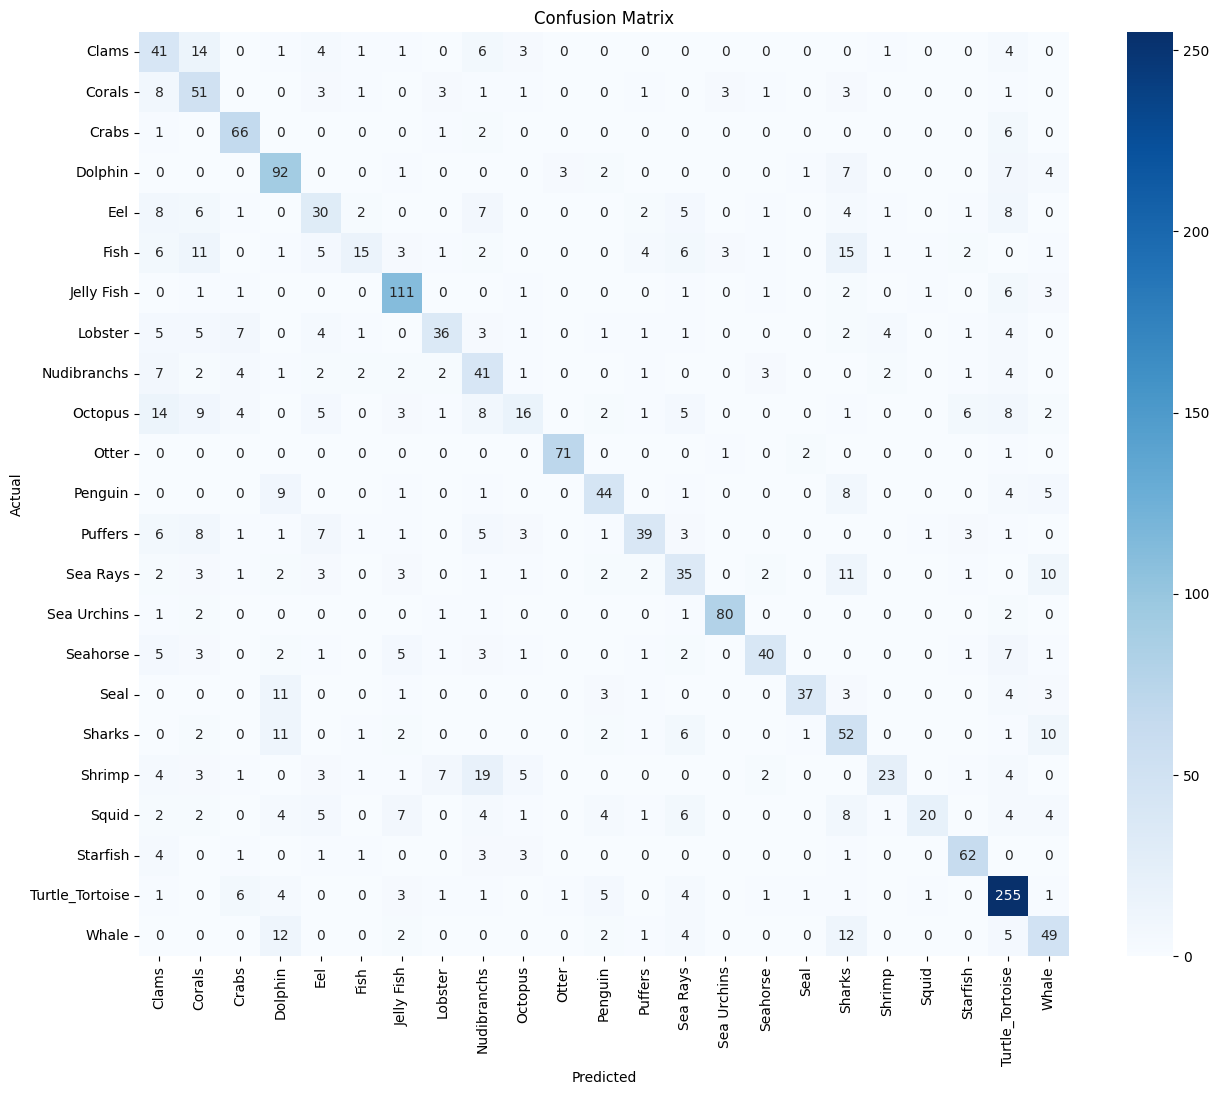

                 precision    recall  f1-score   support

          Clams       0.36      0.54      0.43        76
         Corals       0.42      0.66      0.51        77
          Crabs       0.71      0.87      0.78        76
        Dolphin       0.61      0.79      0.69       117
            Eel       0.41      0.39      0.40        76
           Fish       0.58      0.19      0.29        78
     Jelly Fish       0.76      0.87      0.81       128
        Lobster       0.67      0.47      0.55        76
    Nudibranchs       0.38      0.55      0.45        75
        Octopus       0.43      0.19      0.26        85
          Otter       0.95      0.95      0.95        75
        Penguin       0.65      0.60      0.62        73
        Puffers       0.70      0.48      0.57        81
       Sea Rays       0.44      0.44      0.44        79
    Sea Urchins       0.92      0.91      0.91        88
       Seahorse       0.77      0.55      0.64        73
           Seal       0.88    

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Test generatordan tüm veriyi tahmin et
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Grad-CAM için Gerekli Kütüphanelerin İçe Aktarılması

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Eğitilmiş Modelin Yüklenmesi ve Katmanlarının İncelenmesi

✿ Daha önce eğittiğim CNN modeli (`sea_animals_cnn_vgg16.h5`) **yükleniyor**:

- `tf.keras.models.load_model(model_path)` ile model dosyası belleğe alınıyor.  
- `model.summary()` ile modelin tüm katmanları, çıktı boyutları ve parametre sayıları görüntüleniyor.  
- Katman isimleri ve yapısı, **Grad-CAM uygularken hangi convolutional katmanı hedefleyeceğimizi belirlemek** için önemli.  

In [26]:
model_path = "/kaggle/working/sea_animals_cnn_vgg16.h5"
model = tf.keras.models.load_model(model_path)
model.summary()  # Hangi layer isimlerini kullanabileceğini görmek için

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,143,385 (80.66 MB)

 Trainable params: 6,428,695 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

# Grad-CAM için Base Model ve Son Convolutional Katmanın Seçilmesi

✿ Bu hücrede Grad-CAM hesaplaması için gerekli model kısmı ve hedef katman tanımlıyorum.

1. **Base Model**  
   - `base_model = model.get_layer('vgg16')` -> Transfer learning kısmı olan VGG16 modeli alınıyor.  
   - `summary()` çıktısına göre katman ismi doğrulanıyor.  

2. **Son Convolutional Katman**  
   - `last_conv_layer_name = "block5_conv3"` -> Grad-CAM için son conv katman seçilir.  
   - Bu katman, modelin sınıflandırma kararına en çok katkıda bulunan feature map’leri içeriyor. 

In [27]:
# Base model (VGG16 kısmı)
base_model = model.get_layer('vgg16')  
last_conv_layer_name = "block5_conv3" 

# Base Model’in Tensorlarının Hazırlanması için Dummy Çağrı

✿ Burada Grad-CAM hesaplaması için **modelin input ve output tensorlarını** hazırlıyorum.

- `dummy_input` ile (1, 224, 224, 3) boyutunda boş bir örnek tensor oluşturuluyor.  
- `base_model(dummy_input)` çağrısı ile modelin katmanları çalıştırılıyor ve tensor yapıları aktive ediliyor.  

In [29]:
dummy_input = np.zeros((1, 224, 224, 3), dtype=np.float32)
_ = base_model(dummy_input)

# Grad-CAM Heatmap Hesaplama Fonksiyonu

✿ Modelin görüntü üzerinde **hangi bölgelere dikkat ettiğini** görselleştirmek için bir fonksiyon tanımlıyorum.

1. **Hedef Katman Çıkışı**  
     
2. **Gradyan Hesaplama**  
 
3. **Heatmap Oluşturma**  
     

In [30]:
def get_gradcam_heatmap(img_array, base_model, last_conv_layer_name='block5_conv3'):
    last_conv_layer = base_model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        inputs=base_model.input,
        outputs=last_conv_layer.output
    )

    with tf.GradientTape() as tape:
        conv_outputs = grad_model(img_array)
        # Dummy prediction için feature maplerin toplamını kullanıyoruz
        class_channel = tf.reduce_mean(conv_outputs, axis=-1)

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Grad-CAM Heatmap’in Görselleştirilmesi ve Kaydedilmesi

✿ Bu hücrede, hesaplanan Grad-CAM heatmap’in orijinal görselle birleştirilerek görselleştirilmesi sağlıyorum.

1. **Görselin Yüklenmesi**  
   - `cv2.imread` ile görüntü okunur ve RGB formatına çevriliyor.  

2. **Heatmap İşleme**  
   - Heatmap, orijinal görsel boyutuna yeniden boyutlandırılır.  
   - 0–255 aralığına normalize edilip renkli bir colormap (`COLORMAP_JET`) uygulanır.  

3. **Görsellerin Birleştirilmesi**  
   - `superimposed_img = heatmap * alpha + img` ile heatmap, orijinal görsele saydamlık (`alpha`) ile bindirilir.  

4. **Görselleştirme**  
   - `matplotlib` ile görsel çizdirilir ve eksenler gizlenir.  

In [31]:
def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    plt.figure(figsize=(6,6))
    plt.imshow(np.uint8(superimposed_img))
    plt.axis('off')
    plt.show()

✿ Grad-CAM için kullanılacak test görselini hazırlıyorum.

1. **Görselin Yüklenmesi**  
   - `load_img(test_img_path, target_size=(224,224))` ile görsel belirtilen boyuta yeniden boyutlandırılarak yüklenir.  

2. **Array’e Dönüştürme**  
   - `img_to_array(img)` ile NumPy array formatına çevrilir.  
   - `np.expand_dims(img_array, axis=0)` ile batch boyutu eklenir, modelin beklediği input shape sağlanır.  

3. **Normalize Etme**  
   - Piksel değerleri 0–1 aralığına getirilir ( veri ölçeklemesi uygunluğu için)   

In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_img_path = "/kaggle/working/merged_dataset/Corals/coral1.jpg"
img = load_img(test_img_path, target_size=(224,224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

✿ Hazırladığım test görseli için Grad-CAM heatmap hesaplanıyor ve orijinal görsel üzerine bindirilerek gösteriliyor.

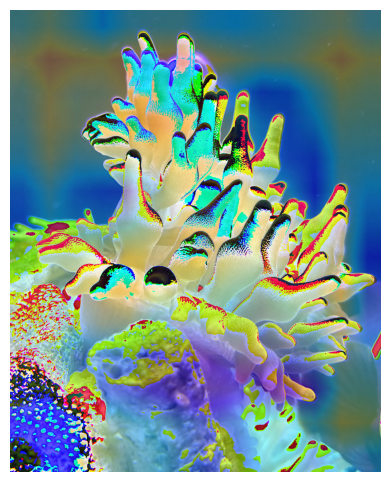

In [34]:
heatmap = get_gradcam_heatmap(img_array, base_model, last_conv_layer_name)
save_and_display_gradcam(test_img_path, heatmap)

# Keras Tuner Kütüphanesinin Kurulması ve İçe Aktarılması

In [80]:
!pip install keras-tuner -q
import keras_tuner as kt

# Keras Tuner ve Veri Hazırlığı için Kütüphanelerin İçe Aktarılması ve Parametrelerin Tanımlanması

Bu hücrede:

1. **Kütüphaneler yükleniyor**  
   - `tensorflow` ve `keras.preprocessing.image` → Model ve veri işlemleri için  
   - `keras_tuner` → Hiperparametre optimizasyonu için  
   - `numpy` ve `matplotlib.pyplot` → Veri işleme ve görselleştirme için  

2. **Dataset yolları belirleniyor**  
   - `train_dir` → Eğitim seti klasörü  
   - `val_dir` → Doğrulama seti klasörü  

3. **Hiperparametreler ve batch ayarları**  
   - `IMG_SIZE = (224, 224)` → Görsellerin yeniden boyutlandırılacağı boyut  
   - `BATCH_SIZE = 32` → Her batch’te işlenecek görsel sayısı (ε(´｡•᎑•`)っ☆ 64 seçmedim çünkü 32 de hafıza daha az kullanılıyor ve gradyan güncellemeleri daha sık)

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt

train_dir = "/kaggle/working/dataset_split/train"
val_dir = "/kaggle/working/dataset_split/val"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Eğitim ve Doğrulama Verisi için Data Augmentation ve Normalizasyon

✿ Model eğitimini başlatmadan önce veriyi uygun formatta ve çeşitlilikte hazırlamak için, Keras Tuner ile kullanılacak eğitim ve doğrulama veri generatorlarını hazırlıyorum.

1. **Eğitim verisi için augmentation (`train_datagen`)**  
   - `rescale=1./255` -> Piksel değerlerini 0–1 aralığına getirir.  
   - `rotation_range`, `width_shift_range`, `height_shift_range`, `shear_range`, `zoom_range`, `horizontal_flip`-> Veri çeşitliliğini artırarak modelin daha genelleyici öğrenmesini sağlar.  
   - `fill_mode='nearest'` -> Görsel taşma/padding durumunda yeni piksellerin doldurma yöntemi.

2. **Doğrulama verisi için sadece normalizasyon (`val_datagen`)**  
   - Validation verisi augmentation uygulanmadan sadece normalize ediliyor, böylece gerçek doğrulama performansı ölçülür.

3. **Generator’lar (`flow_from_directory`)**  
   - `train_generator` ve `val_generator` -> Eğitim ve doğrulama verilerini batch batch modele besler.  
   - `target_size=IMG_SIZE` -> Görseller 224x224 boyutuna yeniden boyutlandırılır.  
   - `batch_size=BATCH_SIZE` -> Her batch’te işlenecek örnek sayısı  
   - `class_mode='categorical'` -> Çok sınıflı sınıflandırma için.



In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generatorlar
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 9601 images belonging to 23 classes.
Found 2048 images belonging to 23 classes.


# Keras Tuner için Model Oluşturma Fonksiyonu (`build_model`)

✿ Bu hücrede, **hiperparametre optimizasyonu için model oluşturma fonksiyonu** tanımlıyorum.

1. **Base Model**  
   - `VGG16` önceden eğitilmiş modeli yüklenir  
   - `base_model.trainable = False` -> Transfer learning uygulanır, base katmanlar eğitilmez.

2. **Yeni Üst Katmanlar**    
   - Bu katmanlar datasetimizdeki sınıfları öğrenmek için eklenir.

3. **Hiperparametreler (`hp`)**  
   - `learning_rate` → [0.001, 0.0001, 0.01] seçeneklerinden seçim yapılabilir.  
   - `optimizer_choice` → ['adam','rmsprop','sgd'] seçeneklerinden biri kullanılır.  
   - Seçilen optimizer ve learning rate ile model compile edilir.  

In [40]:
def build_model(hp):
    base_model = tf.keras.applications.VGG16(
        input_shape=(224,224,3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Transfer learning

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    # Hiperparametreler
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-2])
    optimizer_choice = hp.Choice('optimizer', values=['adam','rmsprop','sgd'])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Keras Tuner ile Random Search Tuner Oluşturma

✿ `RandomSearch` kullanarak **hiperparametre araması için tuner** oluşturuyorum. Bu adımı, farklı learning rate ve optimizer kombinasyonlarını otomatik olarak denemek ve en iyi performansı veren modeli bulmak için yapıyorum.

- `build_model` -> Hangi modelin ve hiperparametre aralığının kullanılacağını belirler.  
- `objective='val_accuracy'` -> Tuner, doğrulama doğruluk (validation accuracy) değerini maksimize etmeye çalışır.
- `max_trials=5` -> Tuner 5 farklı hiperparametre kombinasyonunu dener (deneme sayısı).  
- `directory='tuner_dir'` ve `project_name='all_classes_tuner'` ->  Arama sonuçları kaydediliyor ve proje organizasyonu sağlanıyor.  

In [41]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuner_dir',
    project_name='all_classes_tuner'
)

# Keras Tuner ile Hiperparametre Aramasının Başlatılması

✿ Bu hücrede, `tuner.search` ile **model hiperparametreleri otomatik olarak deneniyor**

✿ Keras Tuner'in otomatik olarak optimizer ve learning rate gibi parametreleri test edip en iyi performansı veren modeli seçmesini sağlar.

In [42]:
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)

Trial 5 Complete [00h 10m 05s]
val_accuracy: 0.138671875

Best val_accuracy So Far: 0.361328125
Total elapsed time: 00h 50m 15s


✿ Doğrulama setimde yakaladığım başarı yetersiz olunca :') base modelin son birkaç katmanını açıp (fine-tuning) epoch sayımı artırıyorum.

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Veri Yükleme (DataLoader)

✿ Bu hücrede **`cleaned_dataset`** kullanarak eğitim ve doğrulama verileri hazırlıyorum.

- **`ImageDataGenerator`** ile veri artırma (augmentation) uyguluyorum. Böylece modelim hem veri çeşitliliği kazanacak hem de overfitting riskini azaltacak.

In [7]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "cleaned_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    "cleaned_dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 10994 images belonging to 23 classes.
Found 2736 images belonging to 23 classes.


# HyperModel (Fine-Tuning Destekli)

✿ Keras Tuner kullanılarak **en iyi hiperparametre kombinasyonunu** bulmak için kullandığım bu hücrede  **VGG16 tabanlı transfer learning modeli** ve **hyperparameter tuning** için model mimarisi tanımlıyorum.

- **Fine-Tuning**
  - Son 4 katman eğitilebilir (`trainable=True`), diğer katmanlar donduruluyor (`trainable=False`).
  - Bu sayede model, önceden öğrenilmiş özellikleri korurken yeni veri setimize uyum sağlıyor.

In [8]:
def build_model(hp):
    base_model = keras.applications.VGG16(
        include_top=False, 
        input_shape=(224,224,3),
        weights="imagenet"
    )

    # Son birkaç katmanı açalım (fine-tuning)
    for layer in base_model.layers[:-4]:
        layer.trainable = False
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    x = layers.Flatten()(base_model.output)
    x = layers.Dense(
        units=hp.Choice("dense_units", [128, 256, 512]),
        activation="relu"
    )(x)
    x = layers.Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1))(x)
    output = layers.Dense(train_generator.num_classes, activation="softmax")(x)

    model = keras.Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=hp.Choice("optimizer", ["adam", "rmsprop", "sgd"]),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

✿ *Keras Tuner** ile hiperparametre optimizasyonu için **Random Search** yöntemi tanımlıyorum.

✿ Bu tuner, **en iyi Dense layer boyutu, dropout oranı ve optimizer** kombinasyonunu belirlemek için kullanılıyor ve tüm sınıflar üzerinden çalışacak şekildedir.

- **Tuner Türü:**
  - `kt.RandomSearch` → rastgele hiperparametre kombinasyonlarını dener.
  
- **Parametreler:**
  - `build_model` → önceki hücrede tanımlanan HyperModel fonksiyonu.
  - `objective="val_accuracy"` → doğrulama doğruluğu en iyi olan modeli seçmek için hedef.
  - `max_trials=5` → toplam deneme sayısı.
  - `executions_per_trial=1` → her denemenin tek bir kez çalıştırılması.

In [9]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="project_tuner_all_classes",
    project_name="class_tuning"
)

I0000 00:00:1758803032.781173      83 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758803032.781870      83 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Random Search Tuner** kullanılarak modelin en iyi hiperparametreleri belirleniyor ve eğitim başlatılıyor.

(づ๑•ᴗ•๑)づ ☆ Overfitting riskini azaltmak için EarlyStopping kullanıyorum.

- **EarlyStopping Callback:**
  - `monitor="val_loss"` → doğrulama kaybı izlenir.
  - `patience=3` → kayıp 3 epoch boyunca iyileşmezse eğitim durur.
  - `restore_best_weights=True` → durdurulduğunda en iyi ağırlıklar geri yüklenir.

In [10]:
stop_early = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=8,   # daha uzun eğitim
    callbacks=[stop_early],
    verbose=1
)

Trial 5 Complete [00h 19m 59s]
val_accuracy: 0.7244151830673218

Best val_accuracy So Far: 0.7244151830673218
Total elapsed time: 01h 38m 21s


# En İyi Hiperparametrelerin Alınması

In [12]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'dense_units': 256, 'dropout': 0.4, 'optimizer': 'sgd'}


In [13]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("En iyi Dense layer boyutu:", best_hps.get("dense_units"))
print("En iyi Dropout oranı:", best_hps.get("dropout"))
print("En iyi optimizer:", best_hps.get("optimizer"))

En iyi Dense layer boyutu: 256
En iyi Dropout oranı: 0.4
En iyi optimizer: sgd


In [14]:
model = tuner.hypermodel.build(best_hps)

# Modelin Eğitilmesi

✿ Bu hücrede, belirlenen hiperparametrelerle model **eğitim seti üzerinde eğitiyorum** ve doğrulama seti ile performansını izliyorum.

1. `train_generator` -> Modeli eğitmek için kullanılan eğitim verisi  
2. `validation_data=val_generator` -> Eğitim sırasında modelin doğrulama performansını ölçmek için kullanılır  
3. `epochs=25` -> Modelin tüm eğitim verisini 25 kez görmesi sağlanır  

> Bu adım, modelin gerçek veri üzerinde öğrenmesini ve doğrulama seti ile overfitting veya underfitting durumlarının kontrolünü sağlıyor. ☆

In [15]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

Epoch 1/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 154s 442ms/step - accuracy: 0.1779 - loss: 2.8982 - val_accuracy: 0.5274 - val_loss: 1.5552
Epoch 2/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 148s 428ms/step - accuracy: 0.5006 - loss: 1.6589 - val_accuracy: 0.6206 - val_loss: 1.2427
Epoch 3/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 147s 427ms/step - accuracy: 0.6119 - loss: 1.2940 - val_accuracy: 0.6648 - val_loss: 1.0952
Epoch 4/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 145s 422ms/step - accuracy: 0.6618 - loss: 1.1405 - val_accuracy: 0.6754 - val_loss: 1.0556
Epoch 5/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 144s 418ms/step - accuracy: 0.6921 - loss: 1.0155 - val_accuracy: 0.6798 - val_loss: 1.0433
Epoch 6/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 150s 435ms/step - accuracy: 0.7351 - loss: 0.8667 - val_accuracy: 0.6875 - val_loss: 1.0149
Epoch 7/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 149s 434ms/step - accuracy: 0.7496 - loss: 0.8043 - val_accuracy: 0.7131 - val_loss: 0.9326
Epoch 8/25
344/344 ━━━━━━━━━━━━━━━━━━━━ 149s 433ms/step - accuracy: 0.7830 -

# Eğitim ve Doğrulama Doğruluğu Grafiği

- `Mavi çizgi:` Eğitim doğruluğu (train accuracy)
- `Turuncu çizgi:` Doğrulama doğruluğu (validation accuracy)

✿ Model başlangıçta underfitting gösteriyor ama zamanla doğrulama doğruluğu artıyor.
✿ Epoch ilerledikçe doğrulama doğruluğu hızla yükseliyor ve eğitim doğruluğunu geçiyor. Bu, modelin veriyi öğrenmeye başladığını gösteriyor.
✿ Genel olarak overfitting belirtileri fazla yok;

# Eğitim ve Doğrulama Kaybı Grafiği

- `Mavi çizgi:` Eğitim kaybı (train loss)
- `Turuncu çizgi:` Doğrulama kaybı (val loss)

✿ Başlangıçta kayıp yüksek, ilerledikçe düşüyor.
✿ Eğitim kaybı doğrulama kaybının hemen altına düşmediği için model tamamen ezberlememiş, yani regularization (Dropout) işe yaramış.

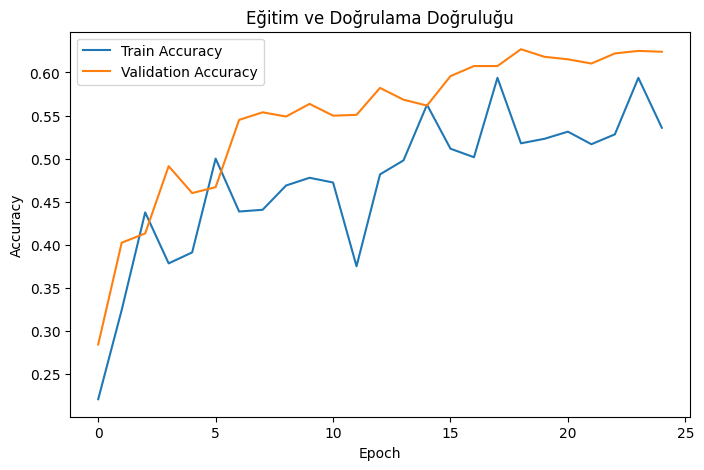

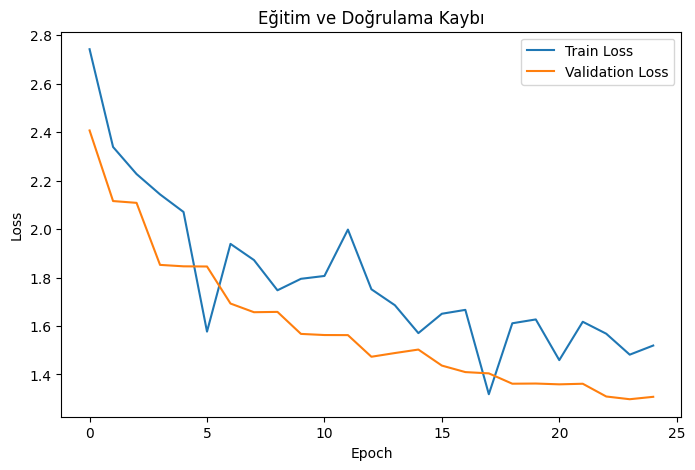

In [43]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()